<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - Linear Regression
    </div>
<br><br>
<font size=4>
   **Name**: Amirreza Bagheri Delouee<br>
   **Student ID**: 98109804<br> <br>

<font face="Times New Roman" size=4><div dir=ltr>
# Problem 1: Linear Regression Model (40 + 30 optional points)
According to <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/blob/main/Jupyter_Notebooks/Chapter_02_Classical_Models/Linear%20regression.ipynb"><font face="Roboto">Linear Regression Notebook</font></a>, train a linear regression model on an arbitrary dataset. Explain your chosen dataset and split your data into train and test sets, then predict values for the test set using your trained model. Try to find the best hyperparameters for your model. (Using Lasso Regression, Ridge Regression or Elastic Net and comparing them will have extra optional points)
<br> Explain each step of your workflow.

In [1]:
#TODO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [2]:
boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


c:\Users\Amirreza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include 

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Boston housing dataset gathers data for attributes and prices of houses in different areas of boston.

In [4]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
#converting dataset into a dataframe which is easy to work with
boston_df = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
#add target value column to the dataframe
boston_df['MEDV'] = boston_dataset.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
#some statistics about values of columns
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


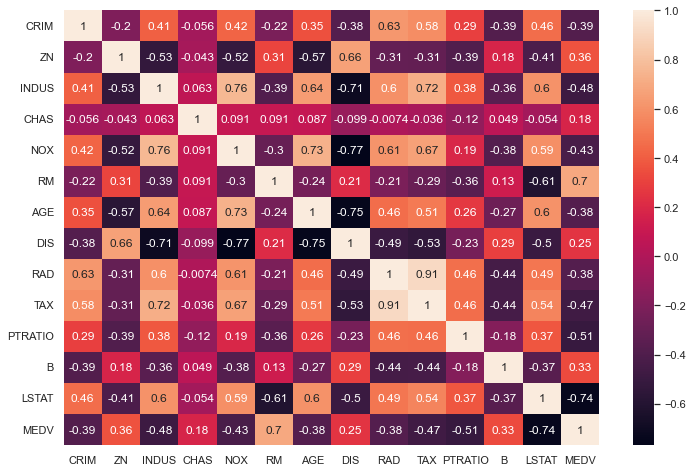

In [31]:
#calculating correlation between different features in order to find the most important factors affecting house prices
corr_mtx = boston_df.corr()
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(data=corr_mtx, annot=True)
plt.show()

Among independent variables which affect MEDV, we only consider those which have high absolute correlation with MEDV, because only those factors can explain change in MEDV and considering other variables doesn't give much information. As can be seen from the above confusion matrix, LSTAT and RM are the most correlated variables with MEDV, hence we choose these columns for X.

In [9]:
boston_df[["LSTAT", "RM"]]

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [10]:
#Extracting independent variables and dependent variables
X = boston_df[["LSTAT", "RM"]].copy()
y = boston_df["MEDV"].copy()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(379, 2)
(127, 2)
(379,)
(379,)


## Linear Regression

In [12]:
## Linear Regression model using sklearn
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
print(f"Intercept is {model.intercept_}")
print(f"Coefficients are {model.coef_} for LSTAT and RM respectively")

Intercept is 1.5383156008014858
Coefficients are [-0.66166167  4.68573056] for LSTAT and RM respectively


In [14]:
#computing training performance
y_train_predict = model.predict(X_train)
rmse = np.sqrt(mse(y_train, y_train_predict))
R2 = r2_score(y_train, y_train_predict)

print("The model performance for train set")
print("--------------------------------------")
print(f"RMSE is {rmse}")
print(f"R2 score is {R2}")

The model performance for train set
--------------------------------------
RMSE is 5.565259945487562
R2 score is 0.637020071718076


In [15]:
#computing test performance
y_test_predict = model.predict(X_test)
rmse = np.sqrt(mse(y_test, y_test_predict))
R2 = r2_score(y_test, y_test_predict)

print("The model performance for test set")
print("--------------------------------------")
print(f"RMSE is {rmse}")
print(f"R2 score is {R2}")

The model performance for test set
--------------------------------------
RMSE is 5.4201379638952565
R2 score is 0.6387428662384788


## Lasso Regression

In [16]:
#Lasso Regression model using sklearn
from sklearn.linear_model import Lasso

In [17]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [18]:
print(f"Intercept is {lasso_model.intercept_}")
print(f"Coefficients are {lasso_model.coef_} for LSTAT and RM respectively")

Intercept is 22.907174330542446
Coefficients are [-0.82471267  1.61502979] for LSTAT and RM respectively


In [19]:
y_train_predict = lasso_model.predict(X_train)
rmse = np.sqrt(mse(y_train, y_train_predict))
R2 = r2_score(y_train, y_train_predict)

print("The model performance for train set using Lasso Regression")
print("--------------------------------------")
print(f"RMSE is {rmse}")
print(f"R2 score is {R2}")

The model performance for train set using Lasso Regression
--------------------------------------
RMSE is 5.820635872655575
R2 score is 0.6029432671405515


In [20]:
y_test_predict = lasso_model.predict(X_test)
rmse = np.sqrt(mse(y_test, y_test_predict))
R2 = r2_score(y_test, y_test_predict)

print("The model performance for test set using Lasso Regression")
print("--------------------------------------")
print(f"RMSE is {rmse}")
print(f"R2 score is {R2}")

The model performance for test set using Lasso Regression
--------------------------------------
RMSE is 5.955336689822156
R2 score is 0.5638776044593135


## Ridge Regression

In [21]:
from sklearn.linear_model import Ridge

In [22]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [23]:
print(f"Intercept is {ridge_model.intercept_}")
print(f"Coefficients are {ridge_model.coef_} for LSTAT and RM respectively")

Intercept is 1.8169689453813334
Coefficients are [-0.66397464  4.64606082] for LSTAT and RM respectively


In [24]:
y_train_predict = ridge_model.predict(X_train)
rmse = np.sqrt(mse(y_train, y_train_predict))
R2 = r2_score(y_train, y_train_predict)

print("The model performance for train set using Ridge Regression")
print("--------------------------------------")
print(f"RMSE is {rmse}")
print(f"R2 score is {R2}")

The model performance for train set using Ridge Regression
--------------------------------------
RMSE is 5.565303272027802
R2 score is 0.6370144199692482


In [25]:
y_test_predict = ridge_model.predict(X_test)
rmse = np.sqrt(mse(y_test, y_test_predict))
R2 = r2_score(y_test, y_test_predict)

print("The model performance for test set using Ridge Regression")
print("--------------------------------------")
print(f"RMSE is {rmse}")
print(f"R2 score is {R2}")

The model performance for test set using Ridge Regression
--------------------------------------
RMSE is 5.423865834256356
R2 score is 0.6382457634358948


## Elastic Net

In [26]:
from sklearn.linear_model import ElasticNet

In [27]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [28]:
print(f"Intercept is {elastic_model.intercept_}")
print(f"Coefficients are {elastic_model.coef_} for LSTAT and RM respectively")

Intercept is 25.64617020349291
Coefficients are [-0.84898117  1.22815994] for LSTAT and RM respectively


In [29]:
y_train_predict = elastic_model.predict(X_train)
rmse = np.sqrt(mse(y_train, y_train_predict))
R2 = r2_score(y_train, y_train_predict)

print("The model performance for train set using Elastic Net Regression")
print("--------------------------------------")
print(f"RMSE is {rmse}")
print(f"R2 score is {R2}")

The model performance for train set using Elastic Net Regression
--------------------------------------
RMSE is 5.88650828134702
R2 score is 0.5939053946098984


In [30]:
y_test_predict = elastic_model.predict(X_test)
rmse = np.sqrt(mse(y_test, y_test_predict))
R2 = r2_score(y_test, y_test_predict)

print("The model performance for test set using Elastic Net Regression")
print("--------------------------------------")
print(f"RMSE is {rmse}")
print(f"R2 score is {R2}")

The model performance for test set using Elastic Net Regression
--------------------------------------
RMSE is 6.052449954733227
R2 score is 0.5495379968499368


## Comparison of Different Models

As can be seen by the results, Linear Regression and Ridge Regression have the two best performances considering R2 score. Comparing intercepts and coefficients, we can see that in Lasso Regression and Elastic Net Regression, the intercept is larger than the other two regression methods but coefficients are smaller. That's due to the Error function defined in each of these regression which prevents coefficients to become large.